In [267]:
%pip install pandas statsmodels seaborn matplotlib scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [268]:
# インポート
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [269]:
# JSONLファイルのパス
jsonl_file_path = './data/listings_2024_sales.json'  # ご自身のファイルパスに置き換えてください

# データをDataFrameに変換
df = pd.read_json(jsonl_file_path, lines=True)


In [270]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,stay_operation_type,prefecture_name,city_name,floor_plan,sqm,number_of_capacity,...,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,住宿,東京都,渋谷区,1R,19.00,2,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8072.677748,12576.291667,6528.581548
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,特区民泊,大阪府,大阪市港区,1DK,27.00,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5595.319149,5883.578947,5000.000000
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,住宿,東京都,大田区,1K,25.99,4,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8341.010638,11029.804054,6595.653509
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,住宿,東京都,墨田区,1K,37.24,5,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,8459.772487,13115.636364,7268.737542
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,住宿,東京都,新宿区,1R,18.55,3,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,8288.753623,10153.216216,6132.968750


In [271]:
# 統計情報

df.describe()

,sqm,number_of_capacity,location_floor,built_year,number_of_s_beds,number_of_sd_beds,number_of_d_beds,number_of_q_beds,number_of_k_beds,number_of_futons,number_of_sofa_beds,total_adr,minpaku_adr,monthly_adr
count,1599.000000,1599.000000,1551.000000,1598.000000,31.000000,64.000000,171.000000,1.0,2.0,31.000000,50.000000,1599.000000,1599.000000,1599.000000
mean,27.255066,3.255159,3.703417,2014.397372,1.483871,1.375000,1.105263,1.0,1.0,1.322581,1.040000,9569.396606,11888.186557,7308.135433
std,11.365421,1.440496,2.160880,14.598030,0.676805,0.519462,0.447905,NaN,0.0,0.475191,0.197949,3948.880015,5857.820130,2631.249355
min,10.710000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,4917.394487,4734.975610,2105.238095
25%,20.130000,2.000000,2.000000,2014.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,7225.552140,8312.126603,5917.189347
50%,25.450000,3.000000,3.000000,2022.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,8565.012195,10755.725000,6738.402878
75%,30.180000,4.000000,5.000000,2023.000000,2.000000,2.000000,1.000000,1.0,1.0,2.000000,1.000000,10278.724820,13285.633784,7798.802494
max,106.100000,12.000000,19.000000,2024.000000,4.000000,3.000000,4.000000,1.0,1.0,2.000000,2.000000,45828.060000,67264.141593,31972.223350


In [272]:
# 欠損値の数
df.isnull().sum()


manual_id                 0
listing_name              0
room_type_id              0
owner_name                0
stay_operation_type       0
prefecture_name           0
city_name                 0
floor_plan                0
sqm                       0
number_of_capacity        0
has_elevator           1320
has_auto_lock          1325
first_line                1
first_station             1
first_walk_min            1
location_floor           48
built_year                1
tag                       0
number_of_s_beds       1568
number_of_sd_beds      1535
number_of_d_beds       1428
number_of_q_beds       1598
number_of_k_beds       1597
number_of_futons       1568
number_of_sofa_beds    1549
total_adr                 0
minpaku_adr               0
monthly_adr               0
dtype: int64

In [273]:
# ダミー変数の追加

df = pd.get_dummies(df, columns=[
    'stay_operation_type',
    'prefecture_name',
    'city_name',
    'floor_plan',
    'tag',
    'first_station',
    'first_line',
], drop_first=True)

df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_都営地下鉄大江戸線,first_line_都営大江戸線,first_line_都営大江戸線・東京メトロ副都心線,first_line_都営新宿線,first_line_都営浅草線,first_line_都電荒川線,first_line_阪急電鉄神戸線,first_line_阪神なんば線,first_line_阪神電鉄阪神なんば線,first_line_ＪＲ中央線
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,無,無,8,4.0,...,False,False,False,False,False,False,False,False,False,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,None,None,10,1.0,...,False,False,False,False,False,False,False,False,False,False
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,有,有,5,4.0,...,False,False,False,False,False,False,False,False,False,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,有,有,4,5.0,...,False,True,False,False,False,False,False,False,False,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,無,無,3,2.0,...,False,False,False,False,False,False,False,False,False,False


In [274]:
# 欠損値の処理

df['number_of_s_beds'].fillna(0, inplace=True)
df['number_of_sd_beds'].fillna(0, inplace=True)
df['number_of_d_beds'].fillna(0, inplace=True)
df['number_of_q_beds'].fillna(0, inplace=True)
df['number_of_k_beds'].fillna(0, inplace=True)
df['number_of_futons'].fillna(0, inplace=True)
df['number_of_sofa_beds'].fillna(0, inplace=True)

df['first_walk_min'] = pd.to_numeric(df['first_walk_min'], errors='coerce')

df['has_elevator'] = df['has_elevator'].map({'有': 1, '無': 0})
df['has_elevator'].fillna(0.5, inplace=True)

df['has_auto_lock'] = df['has_auto_lock'].map({'有': 1, '無': 0})
df['has_auto_lock'].fillna(0.5, inplace=True)

df = df.dropna()

df.isnull().sum()

/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_32423/10565926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['number_of_s_beds'].fillna(0, inplace=True)
/var/folders/pd/2jj0t6nx237d_97r8zs2969c0000gn/T/ipykernel_32423/10565926.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

manual_id                0
listing_name             0
room_type_id             0
owner_name               0
sqm                      0
                        ..
first_line_都電荒川線         0
first_line_阪急電鉄神戸線       0
first_line_阪神なんば線        0
first_line_阪神電鉄阪神なんば線    0
first_line_ＪＲ中央線         0
Length: 265, dtype: int64

In [275]:
# built_yearは築年数に変換

df['built_year'] = 2024 - df['built_year']

In [276]:
# floor_planの変換

# 1Rから始まるものはfloor_plan_group_1Rにまとめる
df['floor_plan_group_1R'] = df[[column for column in df.columns if column.startswith('floor_plan_1R')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1R')], axis=1, inplace=True)

# floor_plan_1DK+Sとfloor_plan_1DKSはfloor_plan_1SDKにまとめる
df['floor_plan_1SDK'] = df[['floor_plan_1DKS', 'floor_plan_1DK+S', 'floor_plan_1DKS']].any(axis=1).astype(int)
df.drop(['floor_plan_1DK+S', 'floor_plan_1DKS'], axis=1, inplace=True)

# 1Kから始まるものはfloor_plan_group_1Kにまとめる
df['floor_plan_group_1K'] = df[[column for column in df.columns if column.startswith('floor_plan_1K')]].any(axis=1).astype(int)
df.drop([column for column in df.columns if column.startswith('floor_plan_1K')], axis=1, inplace=True)

# floor_plan_２LDKはfloor_plan_2LDKにまとめる
df['floor_plan_2LDK'] = df[['floor_plan_２LDK', 'floor_plan_2LDK']].any(axis=1).astype(int)
df.drop(['floor_plan_２LDK'], axis=1, inplace=True)

# データがないカラムを一部削除
df.drop(["floor_plan_4DK", "floor_plan_4LDK", "floor_plan_戸建"], axis=1, inplace=True)

In [277]:
# 寝具関連の変換

# number_of_sd_bedsは>0かどうかでbooleanに変換
df['has_sd_bed'] = (df['number_of_sd_beds'] > 0).astype(int)
df.drop('number_of_sd_beds', axis=1, inplace=True)

df['has_d_bed'] = (df['number_of_d_beds'] > 0).astype(int)
df.drop('number_of_d_beds', axis=1, inplace=True)

df['has_q_bed'] = (df['number_of_q_beds'] > 0).astype(int)
df.drop('number_of_q_beds', axis=1, inplace=True)

df['has_k_bed'] = (df['number_of_k_beds'] > 0).astype(int)
df.drop('number_of_k_beds', axis=1, inplace=True)

df['has_futon'] = (df['number_of_futons'] > 0).astype(int)
df.drop('number_of_futons', axis=1, inplace=True)

df['has_sofa_bed'] = (df['number_of_sofa_beds'] > 0).astype(int)
df.drop('number_of_sofa_beds', axis=1, inplace=True)

In [278]:
# city_nameを変換

# city_nameで始まるもののうち、city_name_大阪市から始まるものはまとめる: いずれかのcity_nameの部分がtrueならば、city_name_大阪市もtrue
df['city_name_大阪市'] = df[[col for col in df.columns if col.startswith('city_name_大阪市')]].any(axis=1)
df.drop([col for col in df.columns if col.startswith('city_name_大阪市') and col != 'city_name_大阪市'], axis=1, inplace=True)


array([[<Axes: xlabel='sqm', ylabel='sqm'>,
        <Axes: xlabel='number_of_capacity', ylabel='sqm'>,
        <Axes: xlabel='has_elevator', ylabel='sqm'>,
        <Axes: xlabel='has_auto_lock', ylabel='sqm'>,
        <Axes: xlabel='first_walk_min', ylabel='sqm'>,
        <Axes: xlabel='built_year', ylabel='sqm'>,
        <Axes: xlabel='minpaku_adr', ylabel='sqm'>],
       [<Axes: xlabel='sqm', ylabel='number_of_capacity'>,
        <Axes: xlabel='number_of_capacity', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_elevator', ylabel='number_of_capacity'>,
        <Axes: xlabel='has_auto_lock', ylabel='number_of_capacity'>,
        <Axes: xlabel='first_walk_min', ylabel='number_of_capacity'>,
        <Axes: xlabel='built_year', ylabel='number_of_capacity'>,
        <Axes: xlabel='minpaku_adr', ylabel='number_of_capacity'>],
       [<Axes: xlabel='sqm', ylabel='has_elevator'>,
        <Axes: xlabel='number_of_capacity', ylabel='has_elevator'>,
        <Axes: xlabel='has_elevator'

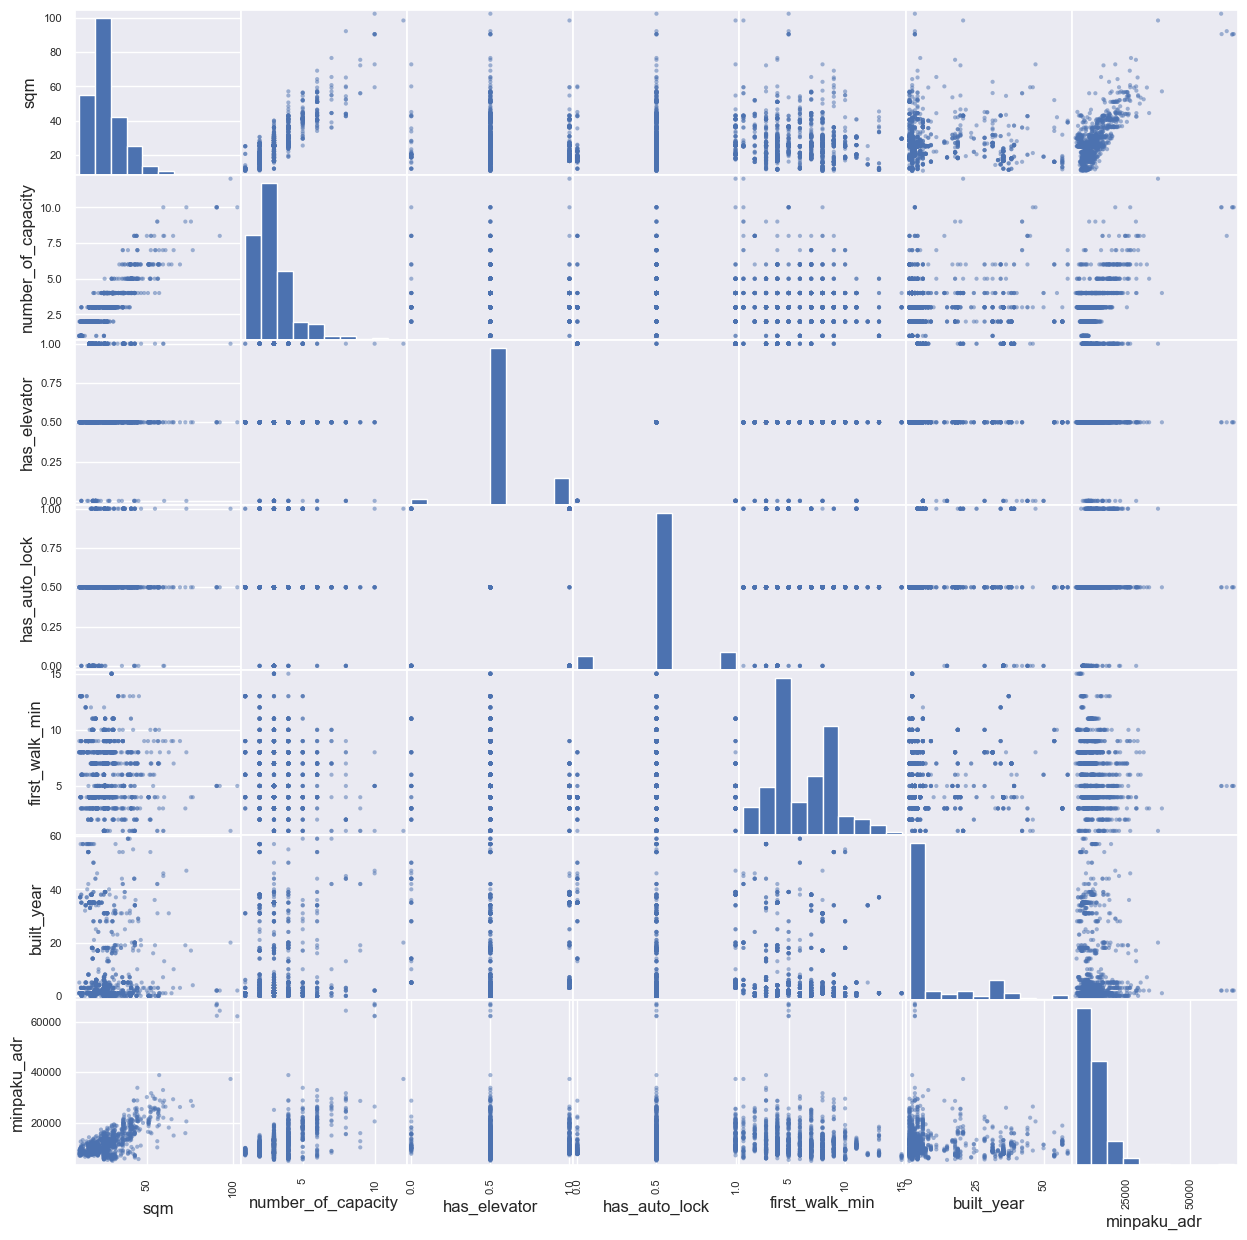

In [279]:
from pandas import plotting

plotting.scatter_matrix(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "minpaku_adr",
    ]],
    figsize=(15, 15),
)

<Axes: >

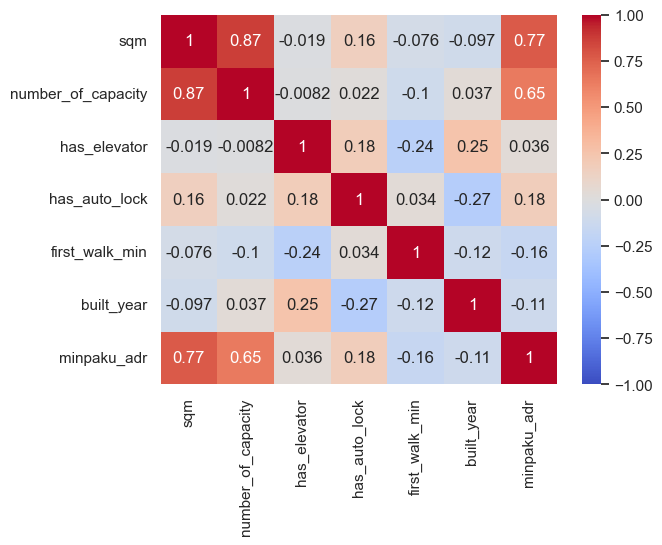

In [280]:
sns.heatmap(
    df[[
        "sqm",
        "number_of_capacity",
        "has_elevator",
        "has_auto_lock",
        "first_walk_min",
        "built_year",
        "minpaku_adr",
    ]].corr(),
    vmin=-1, annot=True, cmap='coolwarm')

In [281]:
df.head()

,manual_id,listing_name,room_type_id,owner_name,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,...,first_line_ＪＲ中央線,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed,city_name_大阪市
0,18-4,REJルフレ恵比寿 403,1f517349-4cc2-47a3-9e70-99669ae22477,MT,19.00,2,0.0,0.0,8.0,4.0,...,False,1,0,0,1,0,0,0,0,False
1,43-1,ラヴィーハイツ 104,b13f6347-603b-4a76-b627-267d7d715103,MT,27.00,4,0.5,0.5,10.0,1.0,...,False,0,0,0,0,0,0,0,0,True
2,71-2,アイディ大森20 406,4e9b9b65-9e8e-432e-92db-53c6900e5bd0,MT,25.99,4,1.0,1.0,5.0,4.0,...,False,0,1,0,1,0,0,0,0,False
3,97-4,トルコブルービル 502,f3222b01-b1ae-4e4e-89a5-8dd06f6e1d5e,MT,37.24,5,1.0,1.0,4.0,5.0,...,False,0,1,1,0,0,0,0,0,False
4,104-1,ヴィンテージデザイン神楽坂 202,17c76a00-0cad-496c-9c22-bdff3857a63a,MT,18.55,3,0.0,0.0,3.0,2.0,...,False,1,0,0,0,0,0,1,0,False


In [282]:
# 統計情報

df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,27.014061,3.225389,0.554404,0.510039,6.071244,3.713731,9.052461,0.029145,9457.487292,11739.696311,...,0.003886,0.029793,0.244171,0.398964,0.040155,0.100389,0.000648,0.000648,0.017487,0.027202
std,10.744551,1.363720,0.198716,0.203811,2.714327,2.159167,13.920493,0.227256,3790.940249,5657.358300,...,0.062237,0.170070,0.429734,0.489844,0.196387,0.300615,0.025449,0.025449,0.131120,0.162725
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,4734.975610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.157500,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7209.448902,8270.871737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.450000,3.000000,0.500000,0.500000,6.000000,3.000000,2.000000,0.000000,8501.971295,10658.066728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.180000,4.000000,0.500000,0.500000,8.000000,5.000000,7.000000,0.000000,10193.919311,13233.378971,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,15.000000,19.000000,59.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [283]:
# 説明変数の定義
features = [
    'number_of_capacity',
    'has_auto_lock',
    'first_walk_min',
]

features += [col for col in df.columns if col.startswith('stay_operation_type_')]

features += [col for col in df.columns if col.startswith('city_name_')]

X = df[features].astype(float)

features

['number_of_capacity',
 'has_auto_lock',
 'first_walk_min',
 'stay_operation_type_旅館業',
 'stay_operation_type_特区民泊',
 'city_name_世田谷区',
 'city_name_中野区',
 'city_name_北区',
 'city_name_台東区',
 'city_name_品川区',
 'city_name_墨田区',
 'city_name_大田区',
 'city_name_文京区',
 'city_name_新宿区',
 'city_name_杉並区',
 'city_name_板橋区',
 'city_name_江戸川区',
 'city_name_渋谷区',
 'city_name_港区',
 'city_name_葛飾区',
 'city_name_豊島区',
 'city_name_大阪市']

In [284]:
# 相関係数を確認
cor = df[features].corr()

cor


,number_of_capacity,has_auto_lock,first_walk_min,stay_operation_type_旅館業,stay_operation_type_特区民泊,city_name_世田谷区,city_name_中野区,city_name_北区,city_name_台東区,city_name_品川区,...,city_name_文京区,city_name_新宿区,city_name_杉並区,city_name_板橋区,city_name_江戸川区,city_name_渋谷区,city_name_港区,city_name_葛飾区,city_name_豊島区,city_name_大阪市
number_of_capacity,1.000000,0.022167,-0.103438,-0.004209,0.154854,-0.083672,-0.040270,-0.012227,0.041741,-0.007295,...,0.039309,-0.082417,0.038009,-0.056142,0.014465,-0.149315,0.179135,0.126508,-0.054139,0.174522
has_auto_lock,0.022167,1.000000,0.034437,0.061220,-0.017284,-0.011442,-0.006696,0.042043,0.208041,-0.002174,...,-0.007168,-0.380697,0.035381,-0.003077,0.061220,0.065868,0.248990,0.061220,0.010237,-0.013419
first_walk_min,-0.103438,0.034437,1.000000,-0.019432,0.052738,0.059984,-0.118048,0.009098,0.127609,-0.017419,...,0.033040,-0.353744,-0.073148,0.067415,-0.010050,0.265661,-0.081965,0.018096,0.194373,0.089750
stay_operation_type_旅館業,-0.004209,0.061220,-0.019432,1.000000,-0.011163,-0.005912,-0.003460,-0.002605,-0.002686,-0.001123,...,-0.003704,-0.013401,-0.002989,-0.001590,-0.000648,-0.008196,0.124464,-0.000648,-0.007222,-0.009450
stay_operation_type_特区民泊,0.154854,-0.017284,0.052738,-0.011163,1.000000,-0.101826,-0.059593,-0.044871,-0.046267,-0.019347,...,-0.063792,-0.230820,-0.051490,-0.027388,-0.011163,-0.141169,-0.089688,-0.011163,-0.124393,0.830383
city_name_世田谷区,-0.083672,-0.011442,0.059984,-0.005912,-0.101826,1.000000,-0.031559,-0.023763,-0.024502,-0.010246,...,-0.033783,-0.122237,-0.027268,-0.014504,-0.005912,-0.074760,-0.047497,-0.005912,-0.065876,-0.086204
city_name_中野区,-0.040270,-0.006696,-0.118048,-0.003460,-0.059593,-0.031559,1.000000,-0.013907,-0.014340,-0.005996,...,-0.019771,-0.071538,-0.015958,-0.008488,-0.003460,-0.043753,-0.027797,-0.003460,-0.038553,-0.050450
city_name_北区,-0.012227,0.042043,0.009098,-0.002605,-0.044871,-0.023763,-0.013907,1.000000,-0.010797,-0.004515,...,-0.014887,-0.053865,-0.012016,-0.006391,-0.002605,-0.032944,-0.020930,-0.002605,-0.029029,-0.037986
city_name_台東区,0.041741,0.208041,0.127609,-0.002686,-0.046267,-0.024502,-0.014340,-0.010797,1.000000,-0.004655,...,-0.015350,-0.055541,-0.012390,-0.006590,-0.002686,-0.033969,-0.021581,-0.002686,-0.029932,-0.039168
city_name_品川区,-0.007295,-0.002174,-0.017419,-0.001123,-0.019347,-0.010246,-0.005996,-0.004515,-0.004655,1.000000,...,-0.006419,-0.023226,-0.005181,-0.002756,-0.001123,-0.014205,-0.009025,-0.001123,-0.012517,-0.016379


In [285]:
df.describe()

,sqm,number_of_capacity,has_elevator,has_auto_lock,first_walk_min,location_floor,built_year,number_of_s_beds,total_adr,minpaku_adr,...,floor_plan_1SDK,floor_plan_2LDK,floor_plan_group_1R,floor_plan_group_1K,has_sd_bed,has_d_bed,has_q_bed,has_k_bed,has_futon,has_sofa_bed
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,...,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,27.014061,3.225389,0.554404,0.510039,6.071244,3.713731,9.052461,0.029145,9457.487292,11739.696311,...,0.003886,0.029793,0.244171,0.398964,0.040155,0.100389,0.000648,0.000648,0.017487,0.027202
std,10.744551,1.363720,0.198716,0.203811,2.714327,2.159167,13.920493,0.227256,3790.940249,5657.358300,...,0.062237,0.170070,0.429734,0.489844,0.196387,0.300615,0.025449,0.025449,0.131120,0.162725
min,10.710000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4917.394487,4734.975610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.157500,2.000000,0.500000,0.500000,4.000000,2.000000,1.000000,0.000000,7209.448902,8270.871737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.450000,3.000000,0.500000,0.500000,6.000000,3.000000,2.000000,0.000000,8501.971295,10658.066728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.180000,4.000000,0.500000,0.500000,8.000000,5.000000,7.000000,0.000000,10193.919311,13233.378971,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,102.400000,12.000000,1.000000,1.000000,15.000000,19.000000,59.000000,4.000000,45828.060000,67264.141593,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
# VIFの計算

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIFの計算
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values('VIF', ascending=False)


,feature,VIF
1,has_auto_lock,9.206559
21,city_name_大阪市,8.493116
0,number_of_capacity,7.659940
2,first_walk_min,7.587171
10,city_name_墨田区,6.734687
4,stay_operation_type_特区民泊,6.136390
13,city_name_新宿区,4.087332
17,city_name_渋谷区,3.641408
11,city_name_大田区,3.640294
20,city_name_豊島区,3.029466


In [287]:
high_vif = vif_data[vif_data['VIF'] > 7]['feature']

X = X.drop(columns=high_vif)


print("VIFが10を超える変数:")
high_vif

VIFが10を超える変数:


0     number_of_capacity
1          has_auto_lock
2         first_walk_min
21         city_name_大阪市
Name: feature, dtype: object

In [288]:
# 特徴量とターゲットの選択
target = 'minpaku_adr'

X = X.astype(float)

y = df[target]

X = add_constant(X)

# 線形回帰モデルの構築
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            minpaku_adr   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     43.69
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.05e-123
Time:                        15:19:17   Log-Likelihood:                -15211.
No. Observations:                1544   AIC:                         3.046e+04
Df Residuals:                    1525   BIC:                         3.056e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7055.3293    685.717     10.289      0.000    5710.281    8400.378
stay_operation_type_旅館業  -1.088e+04   4660.008     -2.336      0.020      -2e+04   -1743.957
stay_operation_type_特区民泊    39.0375    647.713      0.060      0.952   -1231.465    1309.540
city_name_世田谷区            4141.1332    860.614      4.812      0.000    2453.021    5829.245
city_name_中野区             4207.6893   1110.522      3.789      0.000    2029.378    6386.001
city_name_北区              3457.1924   1343.706      2.573      0.010     821.484    6092.900
city_name_台東区             5560.3675   1314.153      4.231      0.000    2982.630    8138.105
city_name_品川区             5311.4428   2755.361      1.928      0.054     -93.255    1.07e+04
city_name_墨田区             5876.6235    731.538      8.033      0.000    4441.696    7311.551
city_name_大田区             1683.3120    595.912      2.825      0.005     514.418    2852.206
city_name_文京区             6883.3996   1066.713      6.453      0.000    4791.019    8975.780
city_name_新宿区             5211.4836    730.743      7.132      0.000    3778.116    6644.851
city_name_杉並区             5151.7172   1219.676      4.224      0.000    2759.298    7544.137
city_name_板橋区             1803.5914   2007.763      0.898      0.369   -2134.677    5741.860
city_name_江戸川区            2235.1792   4672.861      0.478      0.632   -6930.734    1.14e+04
city_name_渋谷区             5711.3789    785.847      7.268      0.000    4169.923    7252.834
city_name_港区              1.744e+04    905.793     19.257      0.000    1.57e+04    1.92e+04
city_name_葛飾区             1.337e+04   4672.861      2.861      0.004    4201.850    2.25e+04
city_name_豊島区             3623.7772    809.935      4.474      0.000    2035.073    5212.481
==============================================================================
Omnibus:                     1234.768   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41776.475
Skew:                           3.467   Prob(JB):                         0.00
Kurtosis:                      27.521   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
# Ridge回帰のR^2を計算

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print("Ridge回帰の平均R²:", scores.mean())

Ridge回帰の平均R²: 0.311090907469984
